# Import module

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import RAW csv file

In [143]:
data = pd.read_csv('/Users/user/Desktop/python/my project/Data/GSPC.csv')
data.index = pd.to_datetime(data.Date, format='%Y-%m-%d')
data.drop(['Date'], axis=1, inplace=True)

In [144]:
data.shape

(17218, 6)

In [145]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


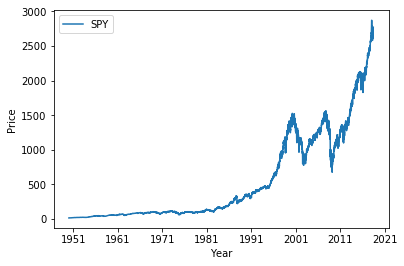

In [146]:
plt.plot(data.index, data['Adj Close'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(['SPY'])
plt.show()

# Check whether Target variable Y is normally distributed
Have a look at the distribution of our price change

In [147]:
data['pct_chg'] = data['Adj Close'].pct_change()[1:]
data.dropna(inplace=True, axis=0)
data.head()

,Open,High,Low,Close,Adj Close,Volume,pct_chg
Date,,,,,,,
1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000,0.011405
1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000,0.004748
1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000,0.002953
1950-01-09,17.080000,17.080000,17.080000,17.080000,17.080000,2520000,0.005889
1950-01-10,17.030001,17.030001,17.030001,17.030001,17.030001,2160000,-0.002927


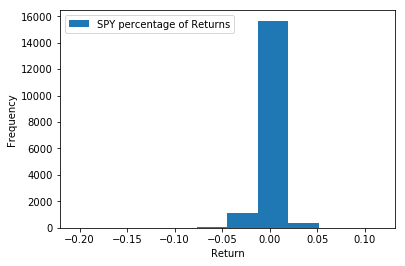

In [148]:
plt.hist(data['pct_chg'])
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['SPY percentage of Returns'])
plt.show()

# Transform it to log return to have a more normalize return

In [149]:
data['lrets'] = np.log(data['Adj Close']/data['Adj Close'].shift(1))
data.dropna(inplace=True, axis=0)
data.head()

,Open,High,Low,Close,Adj Close,Volume,pct_chg,lrets
Date,,,,,,,,
1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000,0.004748,0.004737
1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000,0.002953,0.002949
1950-01-09,17.080000,17.080000,17.080000,17.080000,17.080000,2520000,0.005889,0.005872
1950-01-10,17.030001,17.030001,17.030001,17.030001,17.030001,2160000,-0.002927,-0.002932
1950-01-11,17.090000,17.090000,17.090000,17.090000,17.090000,2630000,0.003523,0.003517


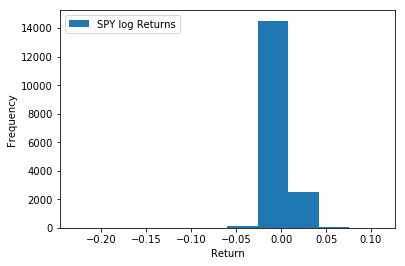

In [150]:
plt.hist(data['lrets'])
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['SPY log Returns'])
plt.show()

# Technical indicator 
- MACD (Trend)
- Stochastics (Momentum)
- Average True Range (Volume)

Similar code from https://github.com/alberduris/SirajsCodingChallenges/tree/master/Stock%20Market%20Prediction

# MACD: 

The Moving Average Convergence/Divergence oscillator (MACD) is one of the simplest and most effective momentum indicators available. The MACD turns two trend-following indicators, moving averages, into a momentum oscillator by subtracting the longer moving average from the shorter moving average.

In [151]:
def MACD(df, period1, period2, periodSignal):
    EMA1 = pd.DataFrame.ewm(df,span=period1).mean() # Provides exponential weighted functions
    EMA2 = pd.DataFrame.ewm(df,span=period2).mean() 
    
    MACD = EMA1-EMA2
    Signal = pd.DataFrame.ewm(MACD,periodSignal).mean()
    
    Histogram = MACD-Signal
    return Histogram

# Stochastics oscillator: 

The Stochastic Oscillator is a momentum indicator that shows the location of the close relative to the high-low range over a set number of periods.

In [152]:
def stochastics_oscillator(df,period):
    l, h = pd.DataFrame.rolling(df, period).min(), pd.DataFrame.rolling(df, period).max()
    k = 100 * (df - l) / (h - l)
    return k

# Average True Range: 

Is an indicator to measure the volalitility (NOT price direction). The largest of:

Method A: Current High less the current Low
Method B: Current High less the previous Close (absolute value)
Method C: Current Low less the previous Close (absolute value)

Will use EGARCH to find volatility in the future

In [153]:
def ATR(df,period):
    '''
    Method A: Current High less the current Low
    '''
    df['H-L'] = abs(df['High']-df['Low'])
    df['H-PC'] = abs(df['High']-df['Close'].shift(1))
    df['L-PC'] = abs(df['Low']-df['Close'].shift(1))
    TR = df[['H-L','H-PC','L-PC']].max(axis=1)
    return TR.to_frame()

# Combine it all

In [165]:
macd = MACD(data['Adj Close'], 12, 26,9)
macd.rename(columns={'Close':'MACD'}, inplace=True)
macd.tail()

Date
2018-05-31    1.405977
2018-06-01    2.091735
2018-06-04    3.287527
2018-06-05    4.060128
2018-06-06    6.057258
dtype: float64

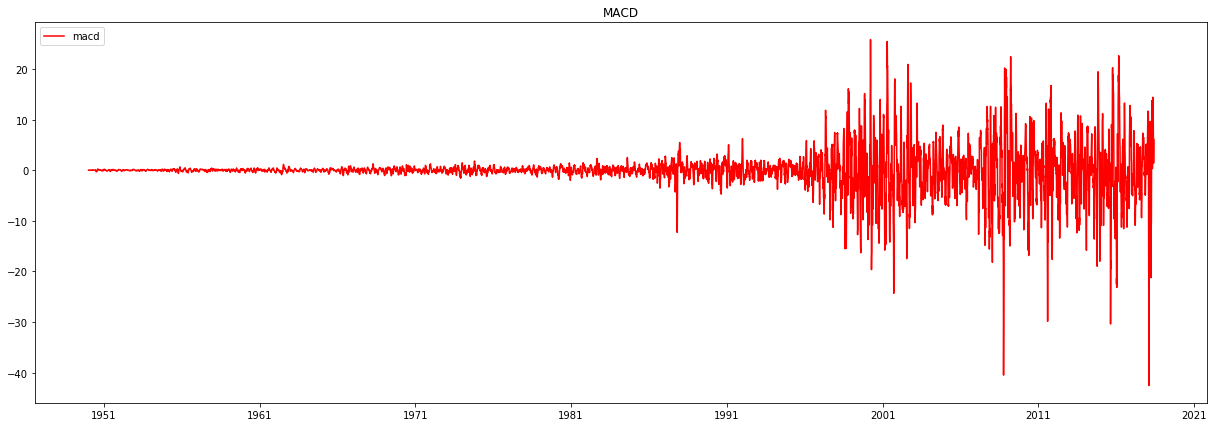

In [155]:
plt.figure(figsize=(21,7))
plt.plot(macd,label='macd',color='red')
plt.title('MACD')
plt.legend(loc='upper left')
plt.show()

In [156]:
stochastics = stochastics_oscillator(data['Adj Close'], 14)
stochastics.rename(columns={'Close':'Stochastics'}, inplace=True)
stochastics.tail()

Date
2018-05-31     35.482241
2018-06-01    100.000000
2018-06-04    100.000000
2018-06-05    100.000000
2018-06-06    100.000000
dtype: float64

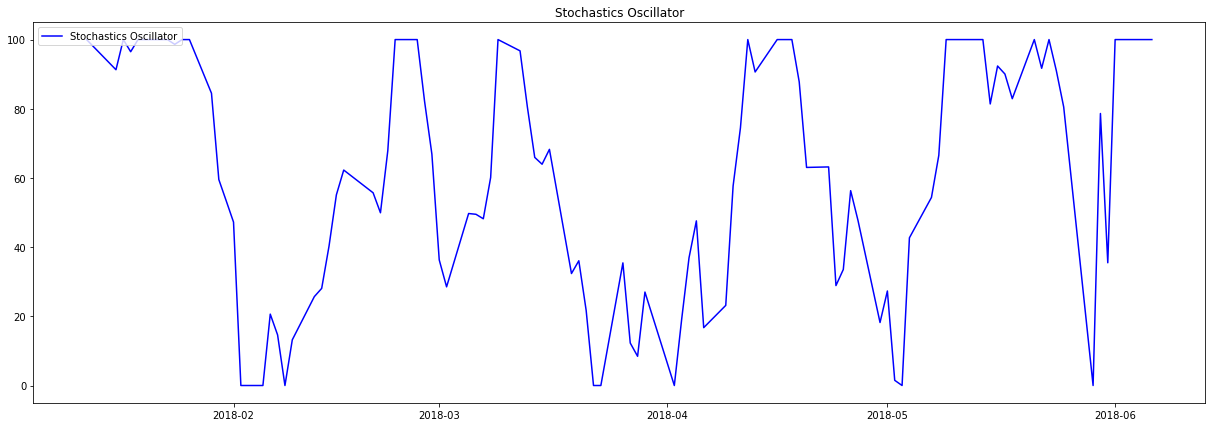

In [157]:
plt.figure(figsize=(21,7))
plt.plot(stochastics[-100:],label='Stochastics Oscillator',color='blue')
plt.title('Stochastics Oscillator')
plt.legend(loc='upper left')
plt.show()

In [158]:
atr = ATR(data,14)
atr.rename(columns={0:'ATR'}, inplace=True)
atr.tail()

,ATR
Date,
2018-05-31,23.330078
2018-06-01,31.659912
2018-06-04,14.539795
2018-06-05,13.100097
2018-06-06,23.929932


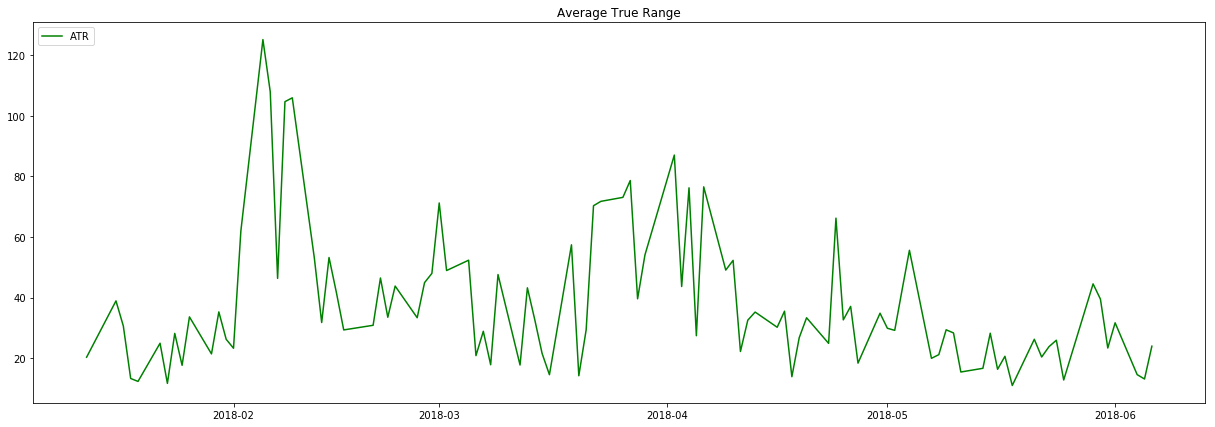

In [159]:
plt.figure(figsize=(21,7))
plt.plot(atr[-100:],label='ATR',color='green')
plt.title('Average True Range')
plt.legend(loc='upper left')
plt.show()

In [160]:
data = pd.concat([data, macd, stochastics, atr], axis=1)

In [166]:
data.rename(columns={0:'MACD', 1:'stochastics'}, inplace=True)

In [167]:
data.drop(['pct_chg', 'H-L', 'H-PC', 'L-PC'], axis=1 , inplace=True)
data.tail()

,Open,High,Low,Close,Adj Close,Volume,lrets,MACD,stochastics,ATR
Date,,,,,,,,,,
2018-05-31,2720.979980,2722.500000,2700.679932,2705.270020,2705.270020,4235370000,-0.006903,1.405977,35.482241,23.330078
2018-06-01,2718.699951,2736.929932,2718.699951,2734.620117,2734.620117,3684130000,0.010791,2.091735,100.000000,31.659912
2018-06-04,2741.669922,2749.159912,2740.540039,2746.870117,2746.870117,3376510000,0.004470,3.287527,100.000000,14.539795
2018-06-05,2748.459961,2752.610107,2739.510010,2748.800049,2748.800049,3517790000,0.000702,4.060128,100.000000,13.100097
2018-06-06,2753.250000,2772.389893,2748.459961,2772.350098,2772.350098,3651640000,0.008531,6.057258,100.000000,23.929932


# Export it as csv

In [168]:
data.to_csv('technical500.csv', index=True)